<a href="https://colab.research.google.com/github/PrusTalbot/PrusTalbot/blob/main/%D0%92%D0%9E%D0%A0%D0%9A%D0%A8%D0%9E%D0%9F%2007-12-23%3A%20%20%D0%9F%D1%80%D0%BE%D0%B3%D0%BD%D0%BE%D0%B7%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5%20%D0%B2%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D1%85%20%D1%80%D1%8F%D0%B4%D0%BE%D0%B2%2C%20PlotlyExpress%2C%20Prophet%2C%20%20%D0%94%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5%20%D0%BF%D1%80%D0%BE%D0%B3%D0%BD%D0%BE%D0%B7%D0%B0%20%D0%BF%D0%BE%20%D0%BD%D0%B5%D0%B7%D0%B0%D0%B2%D0%B8%D1%81%D0%B8%D0%BC%D1%8B%D0%BC%20%D0%BF%D0%B5%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D0%BC%20(%D0%BC%D0%B5%D1%82%D1%80%D0%B8%D0%BA%D0%B0%D0%BC).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ВОРКШОП 07-12-23**


*   Прогнозирование временных рядов
*   PlotlyExpress
*   Prophet
*   Деление прогноза по независимым переменным (метрикам)



In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
from prophet import Prophet

from sklearn.model_selection import train_test_split    # Метод - Делит на тестовую и обучающую выборки (случайным образом)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
from google.colab import files
uploaded=files.upload()

Saving data1.csv to data1.csv


In [4]:
df = pd.read_csv('data1.csv',',')

df['date'] = pd.to_datetime(df['date'])  # Приыедем данные в "дат" в формат даты
df['searches'] = df['searches'].astype(int)

<ipython-input-4-041b962ca6e1>:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  df = pd.read_csv('data1.csv',',')


In [5]:
df

,date,searches,host
0,2021-01-01,1288,Android
1,2021-01-02,1270,Android
2,2021-01-03,1349,Android
3,2021-01-04,1462,Android
4,2021-01-05,1493,Android
...,...,...,...
725,2021-12-27,36354,Mobile Web
726,2021-12-28,36383,Mobile Web
727,2021-12-29,36565,Mobile Web
728,2021-12-30,36604,Mobile Web


In [6]:
df_grouped = df.groupby('date')['searches'].sum().reset_index() # По Дате просуммируй searches

fig = px.line(df_grouped, x='date', y='searches', title='График на каждый день')
fig.show()

In [7]:
fig = px.line(df, x="date", y="searches", color="host", title='Search Load') # добавили разбивку по host
fig.update_traces(textposition="bottom right")
fig.show()

Лучше проанализировать отдельно а потом суммировать

In [8]:
df_Android = df[df["host"] == 'Android']
df_mobile_web = df[df["host"] == 'Mobile Web']

Для начала проанализируем общий ДатаФрейм

In [9]:
df['date'] = pd.to_datetime(df['date'])
df['DayOfYear'] = df['date'].dt.dayofyear

X = df[['DayOfYear']]
y = df['searches']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Уравнение линейной регрессии: y = {model.coef_[0]} * x + {model.intercept_}")
print(f"Среднеквадратичная ошибка (MSE) на тестовом наборе: {mse}")
print(f"Коэффициент детерминации (R^2) на тестовом наборе: {r2}")

Уравнение линейной регрессии: y = 73.60520003252888 * x + 1572.599046724612
Среднеквадратичная ошибка (MSE) на тестовом наборе: 25703218.861348335
Коэффициент детерминации (R^2) на тестовом наборе: 0.6641256867934129


Попробуем улучшить результат так как r2 маловат
Проанализируем отдельно независимую переменную (android)

In [10]:
df_Android['date'] = pd.to_datetime(df_Android['date'])
df_Android['DayOfYear'] = df_Android['date'].dt.dayofyear # взяли порядковый номер дня (1-365)

X = df_Android[['DayOfYear']]
y = df_Android['searches']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Уравнение линейной регрессии: y = {model.coef_[0]} * x + {model.intercept_}")
print(f"Среднеквадратичная ошибка (MSE) на тестовом наборе: {mse}")
print(f"Коэффициент детерминации (R^2) на тестовом наборе: {r2}")

Уравнение линейной регрессии: y = 49.93202524332043 * x + 1163.2346545636847
Среднеквадратичная ошибка (MSE) на тестовом наборе: 2670.501976461444
Коэффициент детерминации (R^2) на тестовом наборе: 0.9999204693426045


<ipython-input-10-8091ccbc28a0>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-10-8091ccbc28a0>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Возьмем другие данные. более реалистичные

In [11]:
from google.colab import files
uploaded=files.upload()

Saving data2.csv to data2.csv


In [12]:
df = pd.read_csv('data2.csv',',')

df['date'] = pd.to_datetime(df['date'])
df['searches'] = df['searches'].astype(int)

<ipython-input-12-a3b34f8e7370>:1: FutureWarning:

In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.



In [13]:
df

,date,host,searches
0,2016-01-01,iOS,23833
1,2016-01-01,mobile_web,8708
2,2016-01-02,Android,1
3,2016-01-02,iOS,25793
4,2016-01-02,mobile_web,9012
...,...,...,...
3608,2018-12-30,web,74387
3609,2018-12-31,Android,18125
3610,2018-12-31,iOS,36215
3611,2018-12-31,mobile_web,15476


Посмотрим на все данные целиком без разбивок

In [14]:
df_grouped = df.groupby('date')['searches'].sum().reset_index()

fig = px.line(df_grouped, x='date', y='searches', title='График на каждый день')
fig.show()

Всплеск в июле - сезонность


июль 2018 - некая активность

Сделаем развивку

In [15]:
fig = px.line(df, x="date", y="searches", color="host", title='Search Load')
fig.update_traces(textposition="bottom right")
fig.show()

Увидели, что в июле 2018 запустики некую ВЭБ фичу
IOS сильно шумит, но это может быть и сезонность

Мобайл ВЭБ - аналогично

Андроид - короткий путь

ВЭБ - сильно поменял картину

Вывод - рассматривать отдельно



In [16]:
df_iOS = df[df["host"] == 'iOS']
df_web = df[df["host"] == 'web']
df_Android = df[df["host"] == 'Android']
df_mobile_web = df[df["host"] == 'mobile_web']

In [18]:
df_iOS


,date,host,searches
0,2016-01-01,iOS,23833
3,2016-01-02,iOS,25793
6,2016-01-03,iOS,30181
9,2016-01-04,iOS,30813
12,2016-01-05,iOS,32686
...,...,...,...
3594,2018-12-27,iOS,59332
3598,2018-12-28,iOS,61249
3602,2018-12-29,iOS,67328
3606,2018-12-30,iOS,52712


In [20]:
fig_iOS = px.line(df_iOS, x='date', y='searches', title='Search Load iOS')
fig_iOS.update_xaxes(rangeslider_visible=True) # добавили бегунок (слайдер) для оси Х
fig_iOS.show()

Создадим функцию для расчета метрики

In [21]:
def process_data(df, column_name):

    q1, q3 = np.percentile(df[column_name], [25, 75]) # задаем границы
    iqr = q3 - q1  # сама функция

    lower_threshold = q1 - 1.3 * iqr # верхние границы для шумов
    upper_threshold = q3 + 1.3 * iqr

    df['rolling_mean'] = df[column_name].rolling(window=7, min_periods=1, center=True).mean() #создается столбец со скользящим средним, а потом уже оно проверяется на трешхолды, и если вылетает, то берется граничное значение


    df['processed_quartiles'] = np.where((df[column_name] < lower_threshold) | (df[column_name] > upper_threshold), # Если значение выходит за границы - берем среднее
                                         df['rolling_mean'],
                                         df[column_name]
                                        )

    df.drop(columns=['rolling_mean'], inplace=True)
    return df

In [22]:
df_Android = process_data(df_Android, 'searches')

<ipython-input-21-b14687edcc15>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-21-b14687edcc15>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-21-b14687edcc15>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [23]:
df_Android

,date,host,searches,processed_quartiles
2,2016-01-02,Android,1,1.0
5,2016-01-03,Android,5,5.0
8,2016-01-04,Android,23,23.0
11,2016-01-05,Android,2,2.0
14,2016-01-06,Android,15,15.0
...,...,...,...,...
3593,2018-12-27,Android,29327,29327.0
3597,2018-12-28,Android,25078,25078.0
3601,2018-12-29,Android,25013,25013.0
3605,2018-12-30,Android,22245,22245.0


In [24]:
fig = px.line(df_Android, x='date', y=['searches','processed_quartiles'])
fig.show()

Чистка сильно ничего не поменяла

Возьмеме другой ДатаФрейм и действуем аналогично

In [25]:
df_mobile_web = process_data(df_mobile_web, 'searches')

<ipython-input-21-b14687edcc15>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-21-b14687edcc15>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-21-b14687edcc15>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [26]:
df_mobile_web

,date,host,searches,processed_quartiles
1,2016-01-01,mobile_web,8708,8708.0
4,2016-01-02,mobile_web,9012,9012.0
7,2016-01-03,mobile_web,10810,10810.0
10,2016-01-04,mobile_web,11571,11571.0
13,2016-01-05,mobile_web,11506,11506.0
...,...,...,...,...
3595,2018-12-27,mobile_web,26033,26033.0
3599,2018-12-28,mobile_web,23077,23077.0
3603,2018-12-29,mobile_web,25170,25170.0
3607,2018-12-30,mobile_web,24886,24886.0


In [29]:
def forecast(df, column_name, predictions, host):
    df.rename(columns = {'date':'ds',
                         column_name:'y'}, inplace = True) # Переименовываем колонки, т.к. Профет чувствителен к этому
    df = df[['ds', 'y']] # Отсавляем только нужные колонки - требование Профет

    model = Prophet() #Задаем модель
    model.fit(df) #Тренируем модель

    future = model.make_future_dataframe(periods=predictions) # говорим ему - Построй прогноз на нужный период

    forecast = model.predict(future)
    model.plot(forecast)

    model.plot_components(forecast)

    forecast = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
    forecast['host'] = host # Для какого хоста строим прогноз


    return forecast

<ipython-input-29-35de3f232666>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptlkxz06t/n1ib0ymt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptlkxz06t/qlujsphl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87843', 'data', 'file=/tmp/tmptlkxz06t/n1ib0ymt.json', 'init=/tmp/tmptlkxz06t/qlujsphl.json', 'output', 'file=/tmp/tmptlkxz06t/prophet_modelsym5wtqk/prophet_model-20231207174750.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:47:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanp

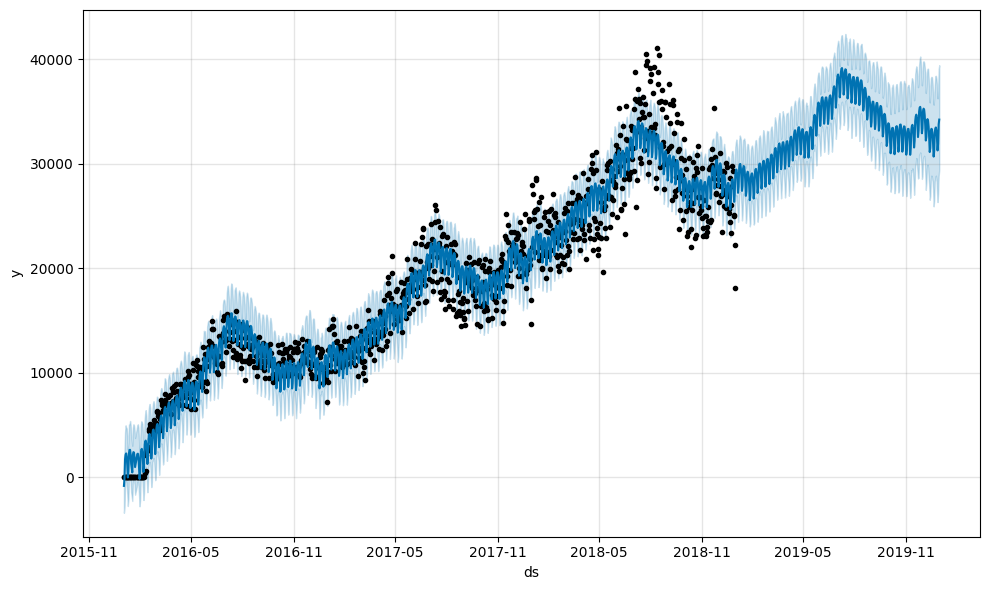

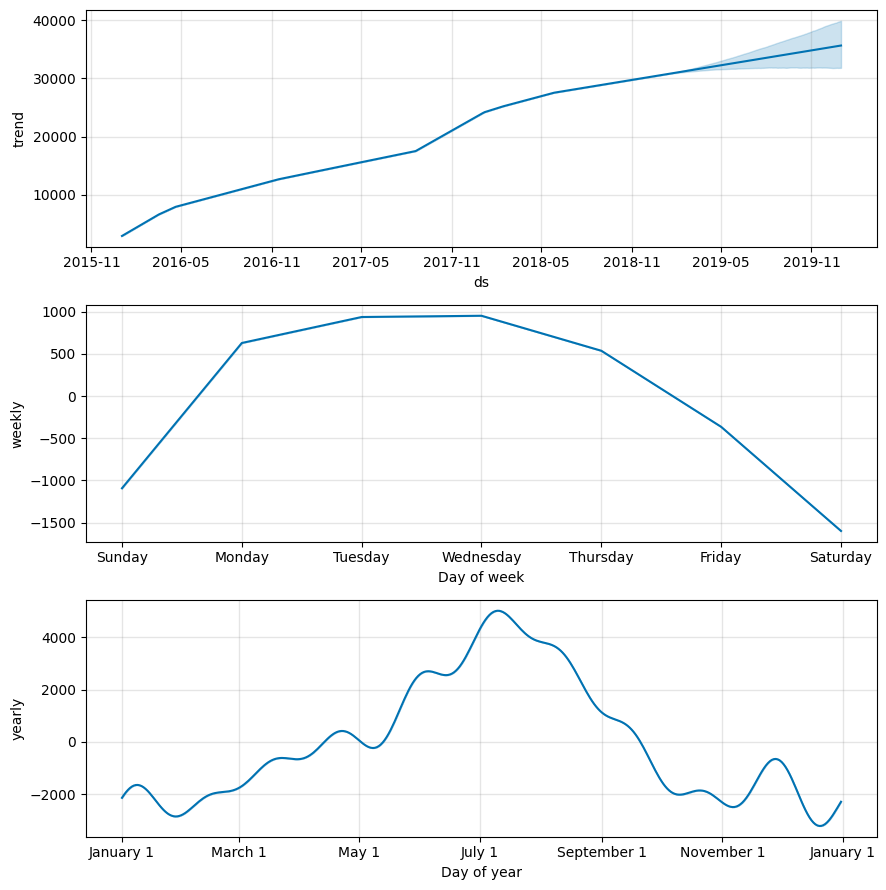

In [30]:
df_Android_forecast = forecast(df_Android, 'searches', 365, 'Android')

Черные точки - реальные значения

Синяя линия - прогноз

Голубая область - доверительный интервал

In [33]:
df_Android_forecast

,ds,yhat,yhat_lower,yhat_upper,host
0,2016-01-02,-803.897513,-3376.069011,1823.288916,Android
1,2016-01-03,-139.263306,-2857.838661,2471.966908,Android
2,2016-01-04,1730.717297,-938.543711,4308.465907,Android
3,2016-01-05,2172.525184,-518.219356,4995.100795,Android
4,2016-01-06,2305.748872,-341.689244,4791.539241,Android
...,...,...,...,...,...
1452,2019-12-27,32403.109101,27332.163936,37509.974015,Android
1453,2019-12-28,31296.855722,26358.338614,36278.313986,Android
1454,2019-12-29,31938.483984,27131.076047,37055.713871,Android
1455,2019-12-30,33800.541260,28845.262090,39101.645986,Android
